### Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

### Import the dataset and check the data type for each columns

In [2]:
data = pd.read_csv('train.csv', parse_dates= True)

In [3]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

### Change the date related columns to datetime format

In [5]:
data['Order Date']= pd.to_datetime(data['Order Date'], format= '%d/%m/%Y')

In [6]:
data['Ship Date']= pd.to_datetime(data['Ship Date'], format= '%d/%m/%Y')

### Create new columns

In [7]:
data['Processing Time'] = data['Ship Date'] - data['Order Date']
data['Processing Time'] = data['Processing Time'].dt.days.astype('int16')
data['Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Month'] = pd.DatetimeIndex(data['Order Date']).month

### Remove unecessary columns

In [8]:
data.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Ship Date'], inplace= True)

### Check the final dataset

In [9]:
data.head()

,Order Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Processing Time,Year,Month
0,2017-11-08,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,2017,11
1,2017-11-08,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,2017,11
2,2017-06-12,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017,6
3,2016-10-11,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,2016,10
4,2016-10-11,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,2016,10


In [10]:
data.dtypes

Order Date         datetime64[ns]
Ship Mode                  object
Customer Name              object
Segment                    object
Country                    object
City                       object
State                      object
Postal Code               float64
Region                     object
Category                   object
Sub-Category               object
Product Name               object
Sales                     float64
Processing Time             int16
Year                        int64
Month                       int64
dtype: object

# EDA

### 1. Comparisson of each shiping mode

In [30]:
avg_processing = data[['Ship Mode', 'Processing Time']].groupby(data['Ship Mode']).mean().reset_index()

In [12]:
fig = px.bar(avg_processing, x= 'Ship Mode', y ='Processing Time', color= 'Ship Mode', text='Processing Time', title= 'Comparisson of Ship Mode')
fig.show()

### 2. What is the most popular shiping mode

In [31]:
popular_mode = data[['Ship Mode']].groupby(data['Ship Mode']).count()
popular_mode = popular_mode.rename(columns={'Ship Mode':'Counts'}).reset_index()

In [14]:
fig = px.bar(popular_mode, x= 'Ship Mode', y ='Counts', color= 'Ship Mode', text= 'Counts', title= 'Most Popular Shipping Mode')
fig.show()

### 3. Does the processing time getting faster

In [32]:
yoy_performance = data[['Year', 'Ship Mode', 'Processing Time']].groupby(['Year', 'Ship Mode']).mean().reset_index()

In [16]:
fig = px.line(yoy_performance, x='Year', y='Processing Time', color= 'Ship Mode', title= 'Is it getting faster?')
fig.show()

### 4. Are there any corelation between seasons and Processing Time?

In [33]:
monthly_performance = data[['Month', 'Ship Mode', 'Processing Time']].groupby(['Month', 'Ship Mode']).mean().reset_index()

In [18]:
fig = px.line(monthly_performance, x='Month', y='Processing Time', color= 'Ship Mode', title= 'Effect of season on Processing Time')
fig.show()

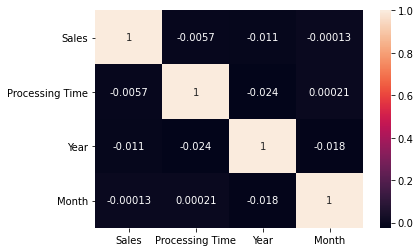

In [19]:
sns.heatmap(data= data[['Sales', 'Processing Time', 'Year', 'Month']].corr(), annot = True)

### 5. Which Category uses which Ship Mode

In [34]:
category_mode = data[['Category', 'Ship Mode', 'Sales']].groupby(['Category', 'Ship Mode']).count().reset_index()

In [21]:
total_order = data[['Category', 'Sales']].groupby(['Category']).count().reset_index()
total_order

,Category,Sales
0,Furniture,2078
1,Office Supplies,5909
2,Technology,1813


In [35]:
temp = category_mode.merge(right= total_order, on= 'Category')
temp['percent_from_total_orders'] = temp['Sales_x'] / temp['Sales_y'] * 100
temp['percent_from_total_orders'] = temp['percent_from_total_orders'].round(2)

In [23]:
fig= px.bar(temp, x= 'Category', y= 'percent_from_total_orders', barmode="group", color = 'Ship Mode', text= 'percent_from_total_orders')
fig.show()

### 6. How was the sales from 2015 - 2018

In [24]:
yearly_sales = data[['Year', 'Sales', 'Category']].groupby(['Year', 'Category']).count().reset_index()

Text(0.5, 1.0, 'Yearly Sales')

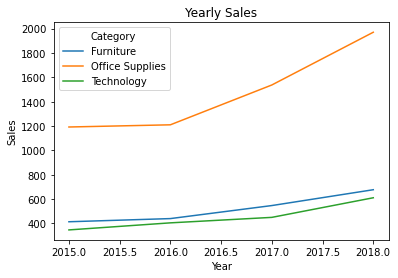

In [25]:
sns.lineplot(data= yearly_sales, x='Year', y= 'Sales', hue= 'Category').set_title('Yearly Sales')

### 7. How are sales trends over the year

In [26]:
monthly_sales = data[['Month', 'Sales', 'Category']].groupby(['Month', 'Category']).count().reset_index()


Text(0.5, 1.0, 'Monthly Sales for Each Category')

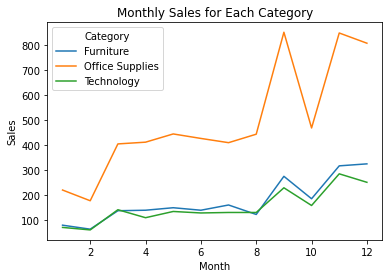

In [27]:
sns.lineplot(data= monthly_sales, x='Month', y= 'Sales', hue= 'Category').set_title('Monthly Sales for Each Category')

### 8. Does the sales drop on October happens every year?

In [28]:
all_sales = data[['Year', 'Month', 'Sales']].groupby(['Year', 'Month']).count().reset_index()

Text(0.5, 1.0, 'Yearly Sales Trends From 2015 - 2018')

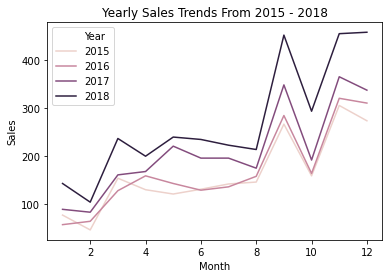

In [29]:
sns.lineplot(data= all_sales, x= 'Month', y= 'Sales', hue= 'Year').set_title('Yearly Sales Trends From 2015 - 2018')

### 9. Does the income on October also decrease

In [39]:
all_income = data[['Year', 'Month', 'Sales']].groupby(['Year', 'Month']).sum().reset_index()

Text(0.5, 1.0, 'Total Sales Trends From 2015 - 2018')

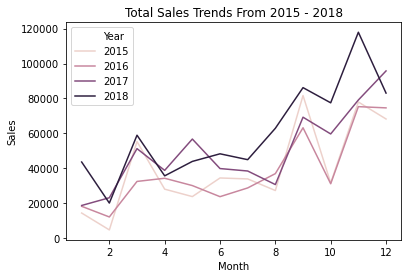

In [60]:
sns.lineplot(data= all_income, x= 'Month', y= 'Sales', hue= 'Year').set_title('Total Sales Trends From 2015 - 2018')